#### Time Series Analysis
- Created: 2021/02/02
- Last Edited: 2021/02/02

In [1]:
# import libraries
import pandas as pd
import numpy as np
from datetime import date, datetime
import time
import requests

import matplotlib.pyplot as plt
%matplotlib inline

import statsmodels.api as sm # statsmodels library
from statsmodels.sandbox.regression.predstd import wls_prediction_std
from statsmodels import tsa # statsmodels package (time series analysis library)
from statsmodels.tsa import stattools
#from statsmodels.tsa.ar_model import AutoReg, ar_select_order

import scipy.optimize

##### Import Equity Data

In [11]:
equity_data = pd.read_excel("Output/Returns_Covariance_Correlation_2021-01-18.xlsx", 
              sheet_name="Daily_Log_Returns_Matrix",
              index_col=0)
equity_data.index.name = "Date"

In [14]:
equity_data.head()

,SPY,AAPL,INTC
Date,,,
2007-01-02,0.013182,0.019134,0.019068
2007-01-05,0.009565,-0.010598,0.005740
2007-01-06,-0.016965,-0.021432,-0.015061
2007-01-07,0.001003,0.005344,0.014538
2007-01-08,-0.008420,-0.003187,-0.005737


We conduct exploratory data analysis:

In [15]:
equity_data.describe()

,SPY,AAPL,INTC
count,3210.000000,3210.000000,3210.000000
mean,-0.000252,-0.000956,-0.000341
std,0.012249,0.019694,0.018322
min,-0.135577,-0.130194,-0.111988
25%,-0.005568,-0.011039,-0.009548
50%,-0.000582,-0.001002,-0.000624
75%,0.003965,0.007799,0.008740
max,0.103637,0.197470,0.132210


We check for autocorrelation in our equity data:

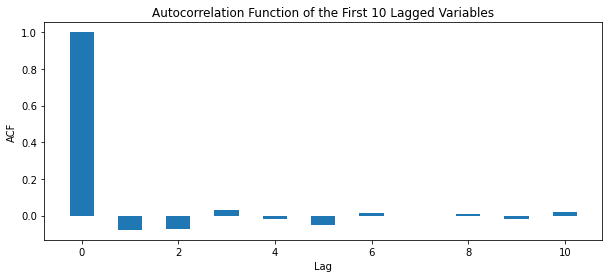

In [16]:
# check for autocorrelation in our market returns
n_lags = 10
y = equity_data["SPY"]
acf = stattools.acf(y, nlags=n_lags, qstat=True, fft=False)

plt.figure(figsize=(10,4))
plt.bar(range(0,n_lags+1), acf[0], width=0.5)
plt.title("Autocorrelation Function of the First 10 Lagged Variables"); plt.xlabel("Lag"); plt.ylabel("ACF")
plt.show()

In [17]:
# compute the Ljung-box Q-statistics for the first 10 lagged variables
n_obs = equity_data["SPY"].count() # number of observations
q_stats = stattools.q_stat(acf[0], n_obs)
q_stats_table = pd.DataFrame({'Q-Value':q_stats[0], 'P-Value':q_stats[1]}, index=range(0,11))
q_stats_table.index.name = 'Lag'
q_stats_table

,Q-Value,P-Value
Lag,,
0,3213.000935,0.0
1,3232.641392,0.0
2,3249.742715,0.0
3,3253.148359,0.0
4,3254.008975,0.0
5,3261.898770,0.0
6,3262.710240,0.0
7,3262.715993,0.0
8,3262.888003,0.0


In [20]:
# export to excel
with pd.ExcelWriter("Output/Time_Series_Analysis_{}.xlsx".format(date.today())) as output:
    equity_data.to_excel(output, sheet_name="Equity_Returns")
    q_stats_table.to_excel(output, sheet_name="Ljung_Q_stats")